# Big Data Applications Part II
**Student ID:** up2121165 

**Date:** 2025-05-06



---


## Q1: Pandas DataFrame

In [20]:
import pandas as pd
import numpy as np

# Creates a DataFrame with custom row and column labels
rows, cols = 6, 5
df = pd.DataFrame(np.random.rand(rows, cols),
                  index=[f'Row{i}' for i in range(1, rows+1)],
                  columns=[f'Col{j}' for j in range(1, cols+1)])

# Display the DataFrame
print("DataFrame:")
print(df)

# Summary info
print("\nInfo:")
print(df.info())

# Shape
print("\nShape:")
print(df.shape)

# Descriptive statistics
print("\nDescribe:")
print(df.describe())

DataFrame:
          Col1      Col2      Col3      Col4      Col5
Row1  0.123948  0.619068  0.509867  0.885106  0.322818
Row2  0.012068  0.792970  0.082285  0.092280  0.177824
Row3  0.559064  0.720650  0.116926  0.849531  0.888489
Row4  0.809522  0.883610  0.822184  0.023087  0.850521
Row5  0.278549  0.712967  0.195971  0.421410  0.877161
Row6  0.251569  0.412435  0.404662  0.968876  0.237293

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Row1 to Row6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    6 non-null      float64
 1   Col2    6 non-null      float64
 2   Col3    6 non-null      float64
 3   Col4    6 non-null      float64
 4   Col5    6 non-null      float64
dtypes: float64(5)
memory usage: 288.0+ bytes
None

Shape:
(6, 5)

Describe:
           Col1      Col2      Col3      Col4      Col5
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.339120  0.690283  0.355316  0.540049  0

## Q2: Iris Dataset

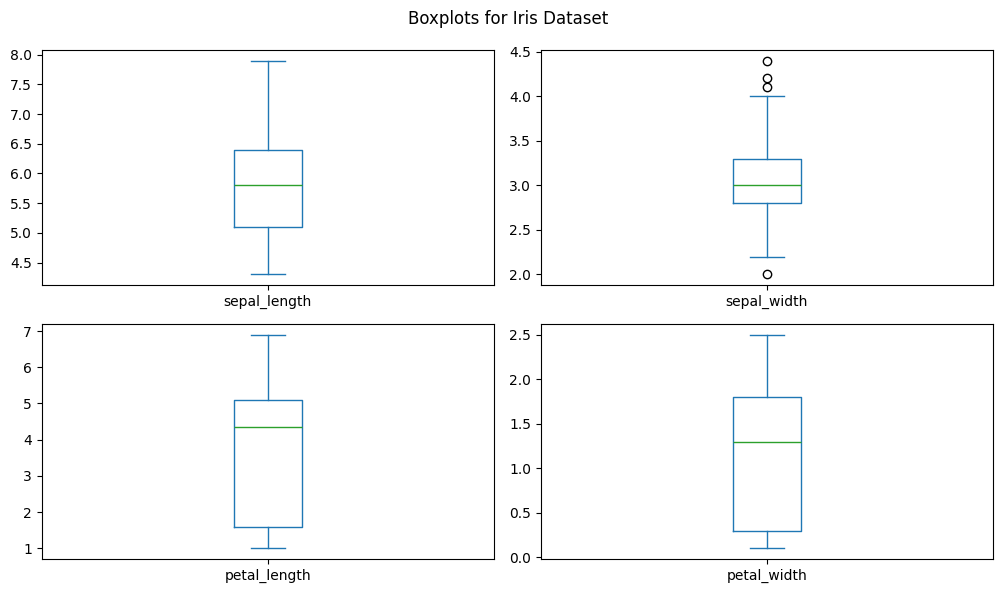

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Create boxplots for each numerical column
iris.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6), title='Boxplots for Iris Dataset')
plt.tight_layout()
plt.show()


## Q3: Sunburst Chart

In [21]:
import plotly.express as px

# Loads the Tips dataset
tips = sns.load_dataset('tips')

# Creates the sunburst chart
fig = px.sunburst(tips, path=['sex', 'day', 'time'], values='tip', title="Sunburst Chart of Tips by Gender, Day, and Time")
fig.show()


/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Q4: Linear Regression

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Loads the tips dataset
tips = sns.load_dataset('tips')

# Prepare data
X = tips[['total_bill']]
y = tips['tip']

# model training
model = LinearRegression()
model.fit(X, y)

# Predict tip for a bill amount using a DataFrame
sample_bill_df = pd.DataFrame([[50]], columns=['total_bill'])
predicted_tip = model.predict(sample_bill_df)

print(f"Predicted tip for a $50 bill: ${predicted_tip[0]:.2f}")


Predicted tip for a $50 bill: $6.17


## Q5: Titanic Model with Categorical Features

Model Accuracy: 0.70


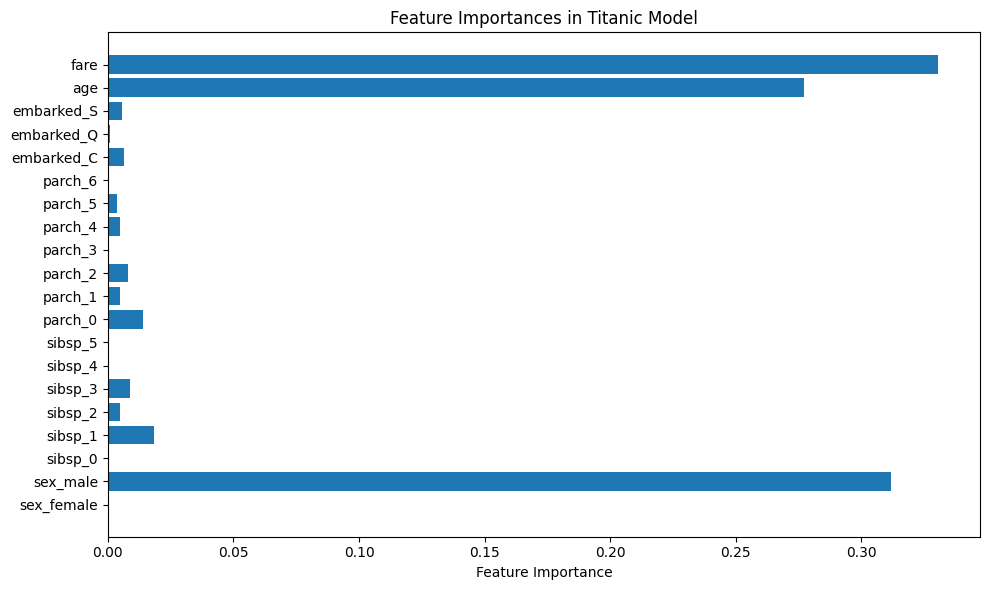

Prediction for example passenger (1=Survived, 0=Did not survive): 0


In [23]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loads the Titanic dataset
titanic = sns.load_dataset('titanic')

# Selecting features and drop rows with all missing values
features = ['age', 'fare', 'sex', 'sibsp', 'parch', 'embarked']
titanic_clean = titanic[features + ['survived']].dropna()

X = titanic_clean[features]
y = titanic_clean['survived']

# Define column transformer with one-hot encoding for the categorical features
categorical_features = ['sex', 'sibsp', 'parch', 'embarked']
numeric_features = ['age', 'fare']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Create pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
clf.fit(X_train, y_train)

# Accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Feature importances
importances = clf.named_steps['classifier'].feature_importances_

# Get feature names
encoded_cat = clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(encoded_cat) + numeric_features

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(all_features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Titanic Model")
plt.tight_layout()
plt.show()

# Example prediction
example = pd.DataFrame([{
    'sex': 'male', 'sibsp': 1, 'parch': 0, 'embarked': 'S', 'age': 30, 'fare': 40
}])
prediction = clf.predict(example)
print("Prediction for example passenger (1=Survived, 0=Did not survive):", prediction[0])
